# **Servo Prediction Using Linear Regression**

**Objective** : using linear regression to predict output value of the time required to respond to a step change in a position set point within a servo system.

**Data source** : YBI foundation

# Import Library

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read Data

In [3]:
servo = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

# Data Preprocessing

In [4]:
servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [5]:
servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [10]:
servo.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [12]:
servo.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [13]:
servo.shape

(167, 5)

# Count of categorical variables

In [15]:
servo[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [16]:
servo[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

# Encoding categorical variables

In [19]:
servo.replace({'Motor':{'A':0, 'B':1, 'C':2, 'D':3, 'E':4}}, inplace=True)

In [20]:
servo.replace({'Screw':{'A':0, 'B':1, 'C':2, 'D':3, 'E':4}}, inplace=True)

# Define Y variable and features of X variable

In [21]:
y = servo['Class']

In [23]:
y.shape

(167,)

In [24]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [22]:
x = servo[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [25]:
x.shape

(167, 4)

In [26]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=2529, train_size=0.7)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

# Modeling

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

# Training model

In [32]:
model.fit(X_train,y_train)

LinearRegression()

# Prediction

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred.shape

(51,)

In [35]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

# Accuracy of model

In [36]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [37]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [38]:
mean_absolute_percentage_error(y_test,y_pred)

0.8268204638174629

In [39]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [40]:
r2_score(y_test,y_pred)

0.6807245170563927

# Data visualization of Actual vs. Prediction

Text(0.5, 1.0, 'Actual vs. Prediction')

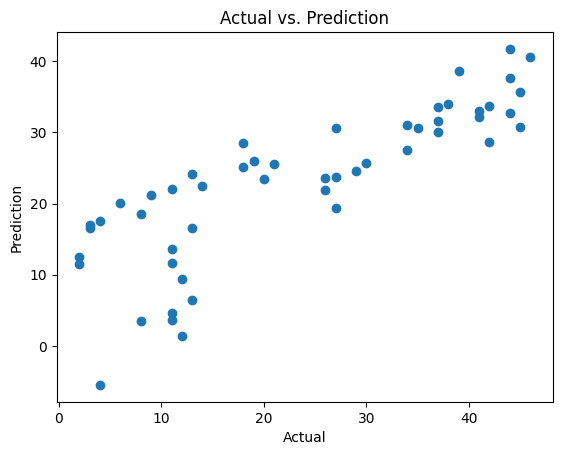

In [63]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

# Getting future predictions

In [48]:
X_new = servo.sample(1)

In [49]:
X_new

,Motor,Screw,Pgain,Vgain,Class
60,4,1,4,2,13


In [50]:
X_new.shape

(1, 5)

In [51]:
X_new = X_new.drop('Class', axis=1)

In [52]:
X_new

,Motor,Screw,Pgain,Vgain
60,4,1,4,2


In [53]:
X_new.shape

(1, 4)

In [54]:
Y_pred_new = model.predict(X_new)

In [55]:
Y_pred_new

array([18.93644455])

# Explaination

Firstly, we can see that there is a difference is the actual data from the servo system and the predicted data using linear regression however there is a high level of error using the linear model which could cause the big difference between actual data and predicted data as the model is only 18% accurate and there is approximately 82% error in the model. Also, the r2 score is quite moderate meaning that there is uncertainity with the correlation between the values of the data set.

 For our future predicted value we found the 18.9 is the output value of the required time to respond to the step change in a position set point.